Load and plot
------------

Find hyperspectral images in a directory, load them and plot previews. Useful for quick data exploration and selection.

In [1]:
import os
import glob

In [2]:
import hylite
import hylite.io as io

Load images

In [3]:
# specify directory and find all .hdr files
path = '/Users/thiele67/Documents/Data/CA/Terrestrial/2020'
files = glob.glob( os.path.join(path,"**/*.hdr"), recursive=True )

# load images, ignoring calibratons, dark references and white references
images = []
names = []
paths = []
for f in files:
    if 'calibration' in f or 'DARKREF'in f or 'WHITEREF' in f:
        continue
    try:
        images.append( io.loadWithGDAL(f) )
        paths.append(f)
        names.append( os.path.basename(f) )
    except:
        pass # ignore - this wasn't an image file

Plot

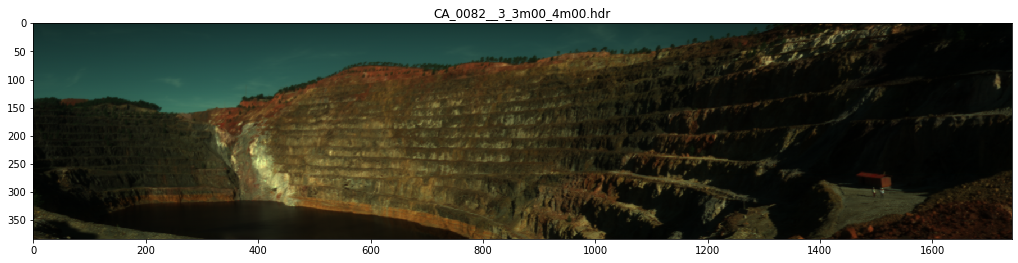

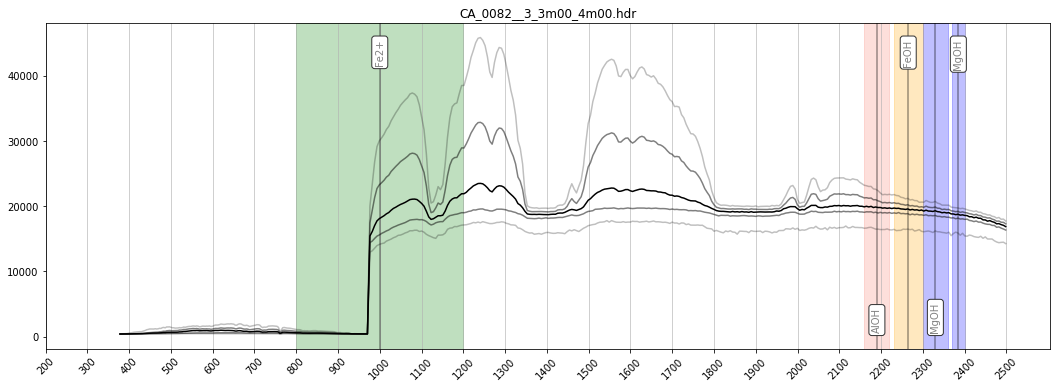

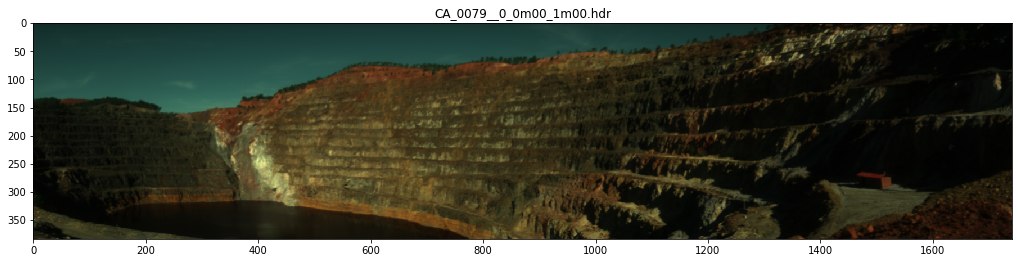

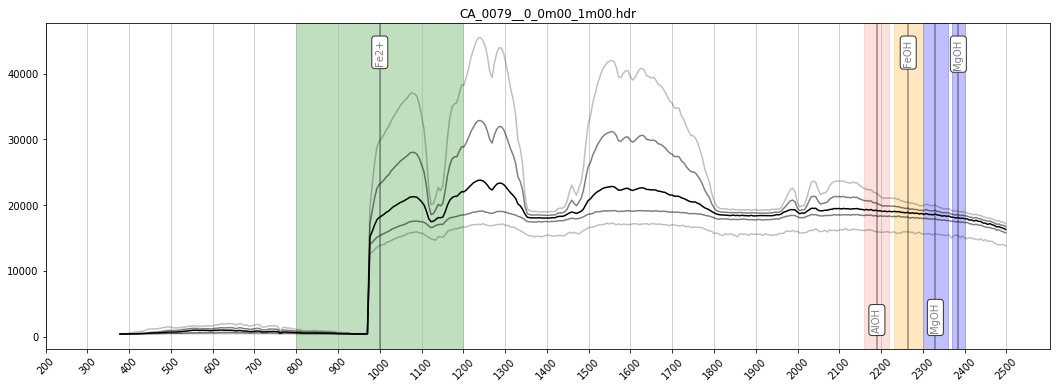

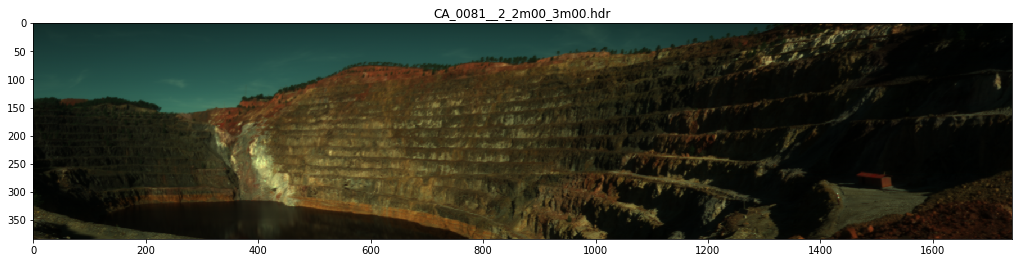

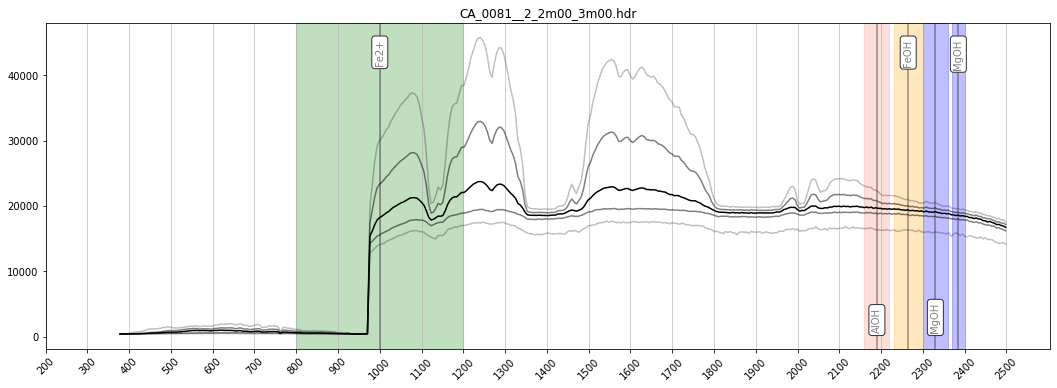

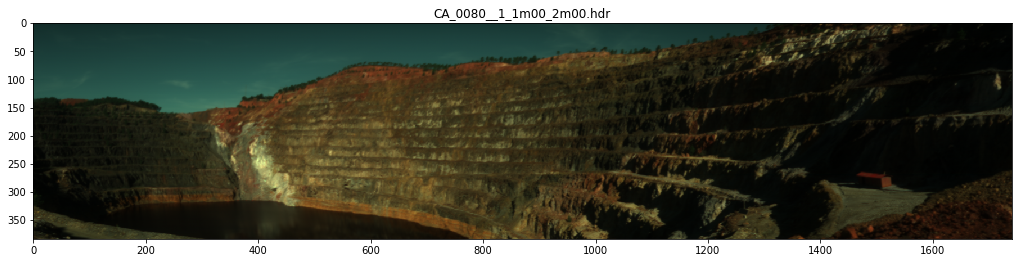

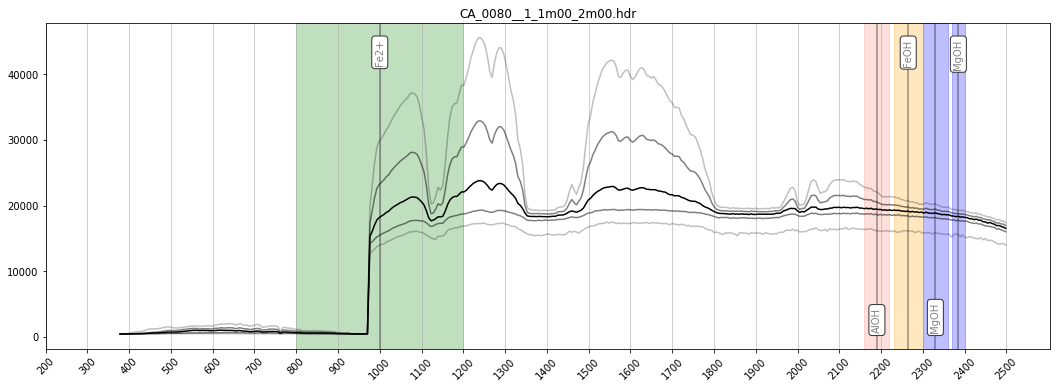

In [4]:
bands = hylite.RGB # try hylite.SWIR or hylite.BROAD for other visualisations
band_range = (0,-1) # set to specific wavelengths to narrow spectra plots. E.g. for SWIR only: band_range=(2000.0,2400.0)
for i,img in enumerate(images):
    
    # rotate image if need be
    if img.aspx() > 1.0: 
        img.rot90()
        img.flip('y')
    
    fig,ax = img.quick_plot( bands )
    ax.set_title(names[i])
    fig.show()
    
    fig,ax = img.plot_spectra()
    ax.set_title(names[i])
    fig.show()

Print paths for easy copying

In [5]:
for i, p in enumerate(paths):
    print(p)

/Users/thiele67/Documents/Data/CA/Terrestrial/2020/CA_0082__3_3m00_4m00/capture/CA_0082__3_3m00_4m00.hdr
/Users/thiele67/Documents/Data/CA/Terrestrial/2020/CA_0079__0_0m00_1m00/capture/CA_0079__0_0m00_1m00.hdr
/Users/thiele67/Documents/Data/CA/Terrestrial/2020/CA_0081__2_2m00_3m00/capture/CA_0081__2_2m00_3m00.hdr
/Users/thiele67/Documents/Data/CA/Terrestrial/2020/CA_0080__1_1m00_2m00/capture/CA_0080__1_1m00_2m00.hdr
